# Data Preparation

In [ ]:
# Libraries import
!pip install openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [ ]:
# Data retrieval and initial exploration
path = '/content/drive/MyDrive/Colab Notebooks/Programming/Databricks/Notebooks/ML/Data/car_evaluation.xlsx'
df_car = pd.read_excel(path, engine='openpyxl')
df_car.head(10)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_car.columns = col_names
df_car

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
df_car.shape

(1727, 7)

In [ ]:
# Data types visualization
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [ ]:
# Check for missing values
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
df_car.describe().T

,count,unique,top,freq
buying,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
lug_boot,1727,3,med,576
safety,1727,3,med,576
class,1727,4,unacc,1209


In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# ML Training Model: Random Forest

In [ ]:
# Import of Scikit-learn libraries
# Robust Scaler: advanced escalator to standardize the data
from sklearn.preprocessing import RobustScaler
# Functions that help to train the ML Model
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
# RFC method to perform classification through decision trees
from sklearn.ensemble import RandomForestClassifier
# Visual representation of the classification model performance
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [ ]:
# Data segmentation in train and set
X = df_car.drop(['class'], axis=1)
y = df_car['class']

In [ ]:
# 30% for test and 70% for train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
# Exploration of X_train
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,med,med,5more,4,big,high
585,high,high,3,more,small,med
1551,low,med,3,4,med,med
727,high,med,4,more,big,high
707,high,med,4,2,big,low


In [ ]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [ ]:
# !pip install category-encoders
!pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
# Given that all the data types are 'object' a transformation is necessary
import category_encoders as ce #pip install category-encoders
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
# Corroboration of the transformation
X_train.head(20)

,buying,maint,doors,persons,lug_boot,safety
1177,1,1,1,1,1,1
585,2,2,2,2,2,2
1551,3,1,2,1,3,2
727,2,1,3,2,1,1
707,2,1,3,3,1,3
887,1,3,4,2,1,3
1000,1,2,2,3,2,1
327,4,4,4,3,3,2
802,2,4,2,2,2,1
832,2,4,3,2,3,1


In [ ]:
# Random forest import
rfc = RandomForestClassifier(random_state = 42, max_depth = 3, n_estimators = 10)
rfc_model = rfc.fit(X_train, y_train)

In [ ]:
# Retrival of the validation score
scores = pd.DataFrame(cross_validate(rfc, X_train, y_train, cv=10, return_train_score=True))
# Performance of the cross validation model
print("Average score of training =", scores['train_score'].mean())

Average score of training = 0.7862413077006332


In [ ]:
print("Average score of validation =", scores['test_score'].mean())
# Individual score per cross validation
scores

Average score of validation = 0.7789738292011019


,fit_time,score_time,test_score,train_score
0,0.079885,0.013076,0.785124,0.812328
1,0.043412,0.005250,0.809917,0.807728
2,0.075050,0.012383,0.768595,0.789328
3,0.128625,0.020481,0.719008,0.765409
4,0.121787,0.004979,0.809917,0.787489
5,0.093890,0.009233,0.809917,0.789328
6,0.106266,0.009594,0.760331,0.777369
7,0.077354,0.026703,0.768595,0.776449
8,0.103021,0.015010,0.783333,0.770221
9,0.104114,0.005502,0.775000,0.786765


In [ ]:
# Visualization of the model performance over the sample data
print(rfc_model.score(X_test, y_test))

0.7996146435452793


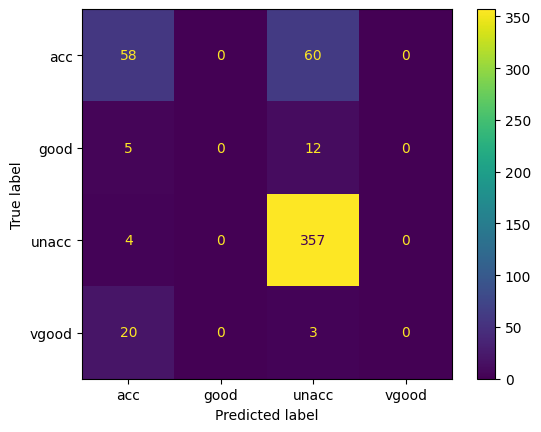

In [ ]:
# Confusion matrix to observ the quantity of right and wrong predictions
ConfusionMatrixDisplay.from_estimator(rfc_model, X_test, y_test)

In [ ]:
# Visualization of relevant features
feature_scores = pd.Series(rfc_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

persons     0.448451
safety      0.418859
buying      0.077753
doors       0.024522
maint       0.016027
lug_boot    0.014388
dtype: float64

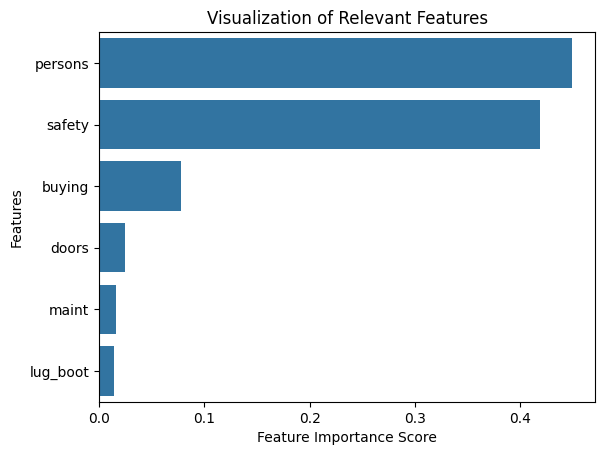

In [ ]:
# Barplot
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualization of Relevant Features")
plt.show()